in this notebook I am checking which and what are the runs used for the analysis

In [1]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import yaml

from gammapy.data import DataStore

In [2]:
hesseras = ['hess1', 'hess2', 'hess1u']
with open("/home/vault/caph/mppi062h/repositories/HESS_3Dbkg_syserror/general_config.yml", "r") as ymlfile:
    cfg = yaml.load(ymlfile, Loader=yaml.FullLoader)
conf=cfg['conf']


full_info = []
for hessera in hesseras:
    runlist= np.loadtxt(f'runlist_{hessera}.txt')
    
    basedir = f'$FITS_PROD/{hessera}/std_{conf}_fullEnclosure'
    ds = DataStore.from_dir(basedir, f'hdu-index-bg-latest-fov-radec.fits.gz', f'obs-index-bg-latest-fov-radec.fits.gz')
    obs_table = ds.obs_table

    mask = [True if obsid in runlist else False for obsid in obs_table['OBS_ID']]
    obs_table=obs_table[mask]
    
    full_info.append(obs_table)

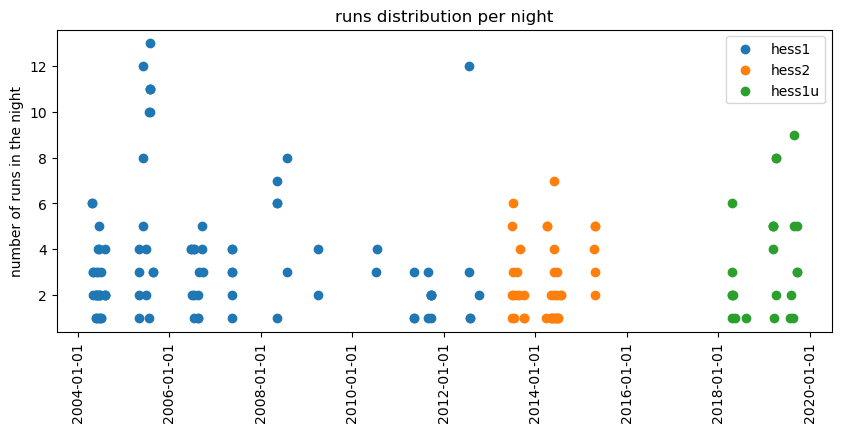

In [70]:
import datetime
import matplotlib.dates as mdates

fig, ax = plt.subplots(1,1, figsize=(10, 4), dpi=100)

for i, table in enumerate(full_info):
    list_date = []
    for date in np.unique(table['DATE-OBS']):
        list_date.append([date, int(np.sum(table['DATE-OBS'] == date))])
    list_date = np.asarray(list_date)
    
    x_values = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in list_date[:, 0]]
        
    formatter = mdates.DateFormatter("%Y-%m-%d")    
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.YearLocator(2)
    ax.xaxis.set_major_locator(locator)

    ax.scatter(x_values, list_date[:, 1].astype(int), label=hesseras[i])
plt.xticks(rotation=90)
plt.ylabel('number of runs in the night')
plt.title('runs distribution per night')
plt.legend()
plt.show()